In [66]:
from datascience import *
import pandas as pd 
import math
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression as lr
from sklearn.metrics import confusion_matrix 
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn import neighbors
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from matplotlib.colors import ListedColormap
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plots
%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
from mpl_toolkits import mplot3d

In [2]:
#import data
data = pd.read_csv("SIREN_data_cleaned.csv")
def df_interact(df):
    '''
    Outputs sliders that show rows and columns of df
    '''
    def peek(row=0, col=0):
        return df.iloc[row:row + 7, col:col + 7]
    interact(peek, row=(0, len(df), 7), col=(0, len(df.columns) - 7))
    print('({} rows, {} columns) total'.format(df.shape[0], df.shape[1]))

In [27]:
#select variables
x = data[["height","htn", "dm", "stroke", "stress"]]
y = data[["case_control"]]
df_interact(data)

interactive(children=(IntSlider(value=0, description='row', max=2842, step=7), IntSlider(value=0, description=…

(2842 rows, 18 columns) total


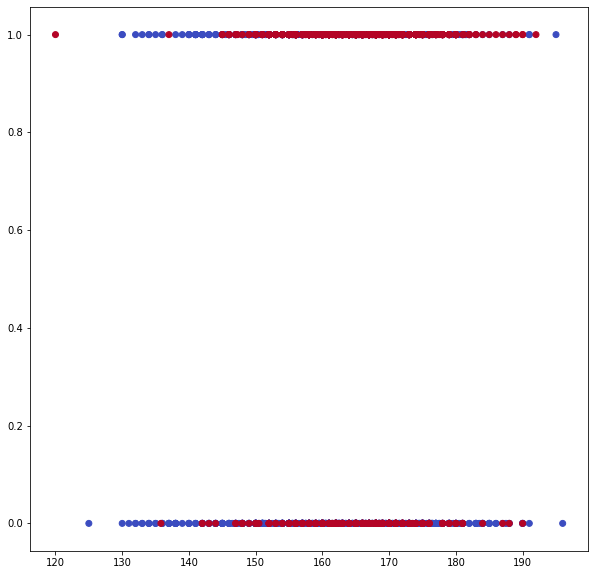

In [158]:
#Selecting two variables 
x_2 = data[["height", "htn"]]
fig = plots.figure(figsize=(10, 10))
ax = plots.axes()
ax.scatter(x_2.iloc[:,0], x_2.iloc[:,1], c=y.iloc[:,0], cmap='coolwarm')



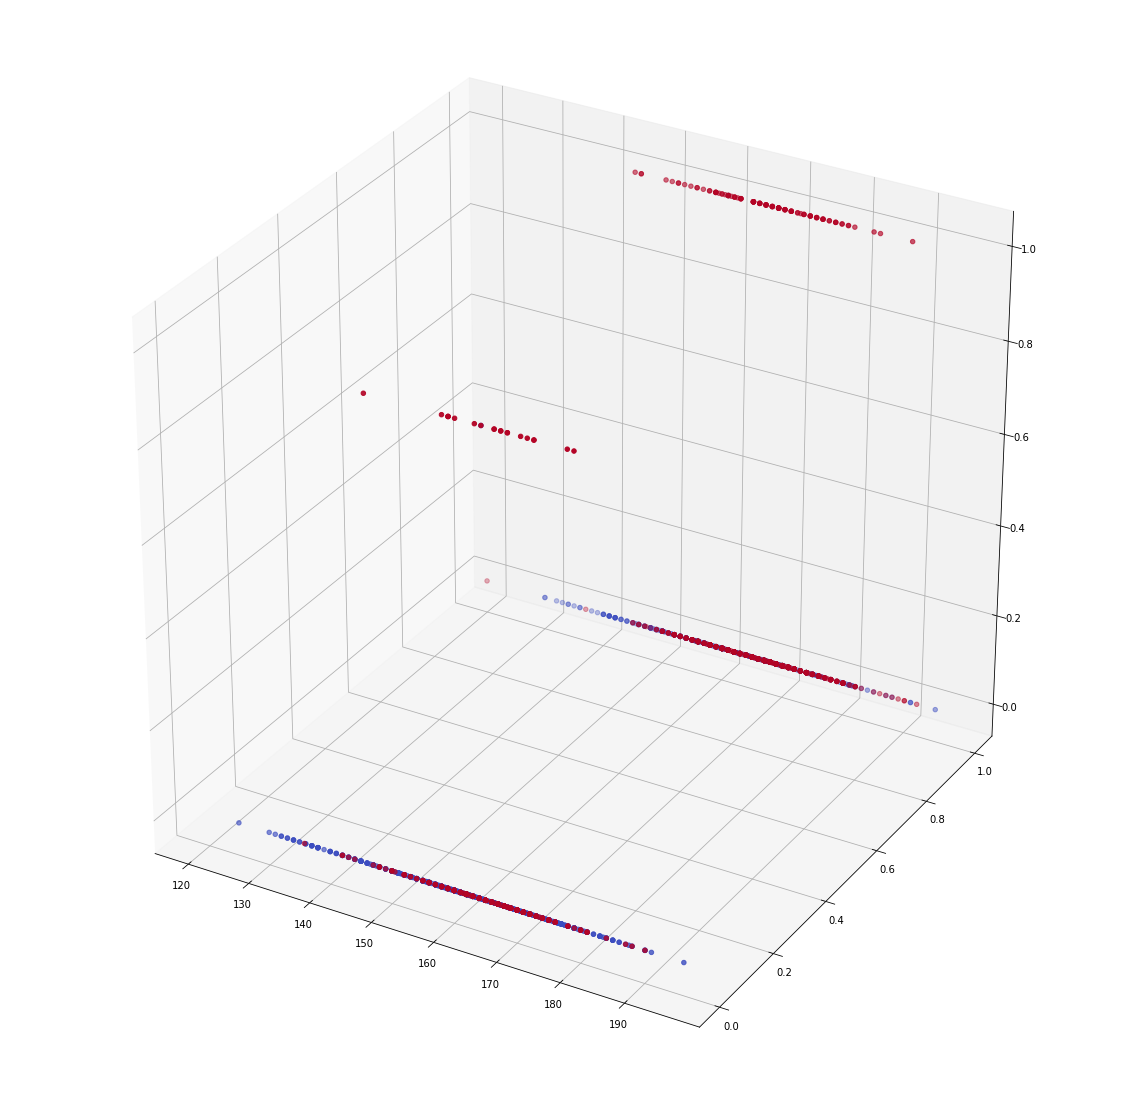

In [149]:
#Selecting three variables 
x_3 = data[["height", "htn", "stroke"]]
fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_3.iloc[:,0], x_3.iloc[:,1], x_3.iloc[:,2], c=y["case_control"], cmap='coolwarm')



In [57]:
#PCA - two components
pca = PCA(n_components=2)
pca.fit(x)
x_pca = pca.transform(x)
c = pca.components_
v = pca.explained_variance_
x_pca

array([[  1.58020086,   0.41129029],
       [  7.58147527,  -0.5321473 ],
       [ -4.41975671,   0.40141039],
       ...,
       [-23.41962235,   0.37012405],
       [ -4.41843987,  -0.5519071 ],
       [ -8.41841158,  -0.55849369]])

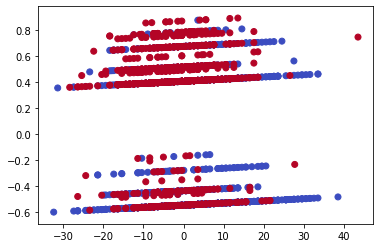

In [51]:
plots.scatter(x_pca[:,0], x_pca[:,1], c=y["case_control"], cmap='coolwarm')

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  del sys.path[0]
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning: `item` has been deprecated and will be removed in a future version
  de

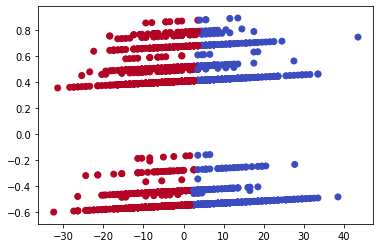

In [147]:
from sklearn import mixture

gm_2 = mixture.GaussianMixture(n_components=2, covariance_type='full')
gm_2.fit(x_pca)
correct = 0
pred = []

for i in range(len(x_pca)):
    predict_me = np.array(x_pca[i,:].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = gm_2.predict(predict_me)
    pred.append(prediction[0])
    if prediction[0] == y.iloc[i].item():
        correct += 1

plots.scatter(x_pca[:,0], x_pca[:,1], c=pred, cmap='coolwarm')


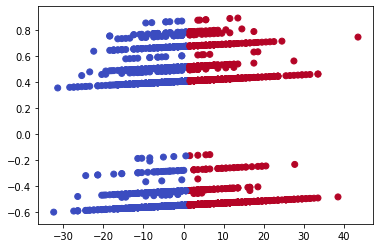

In [111]:
km = KMeans(n_clusters=2)
km.fit(x_pca)
pred = []

for i in range(len(x_pca)):
    predict_me = np.array(x_pca[i,:].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    pred.append(prediction[0])

plots.scatter(x_pca[:,0], x_pca[:,1], c=pred, cmap='coolwarm')


In [38]:
#PCA - three components
pca_3 = PCA(n_components=3)
pca_3.fit(x)
x_pca_3 = pca_3.transform(x)
c_3 = pca_3.components_
v_3 = pca_3.explained_variance_
x_pca_3

array([[  1.58020086,   0.41129029,  -0.20904138],
       [  7.58147527,  -0.5321473 ,  -0.09258502],
       [ -4.41975671,   0.40141039,  -0.22790291],
       ...,
       [-23.41962235,   0.37012405,  -0.28763108],
       [ -4.41843987,  -0.5519071 ,  -0.13030808],
       [ -8.41841158,  -0.55849369,  -0.14288244]])

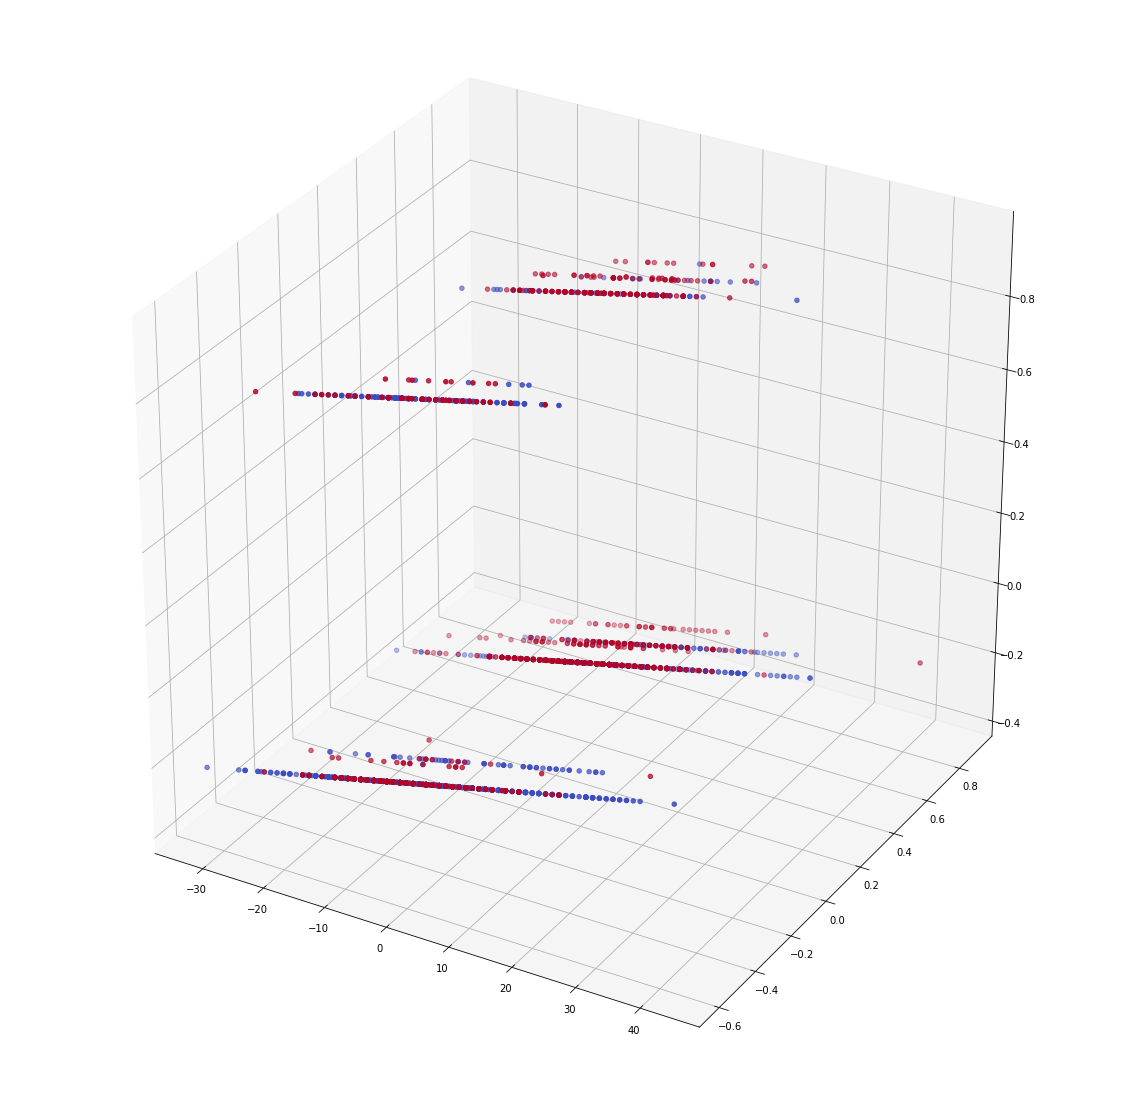

In [52]:
fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_pca_3[:,0], x_pca_3[:,1], x_pca_3[:,2], c=y["case_control"], cmap='coolwarm')


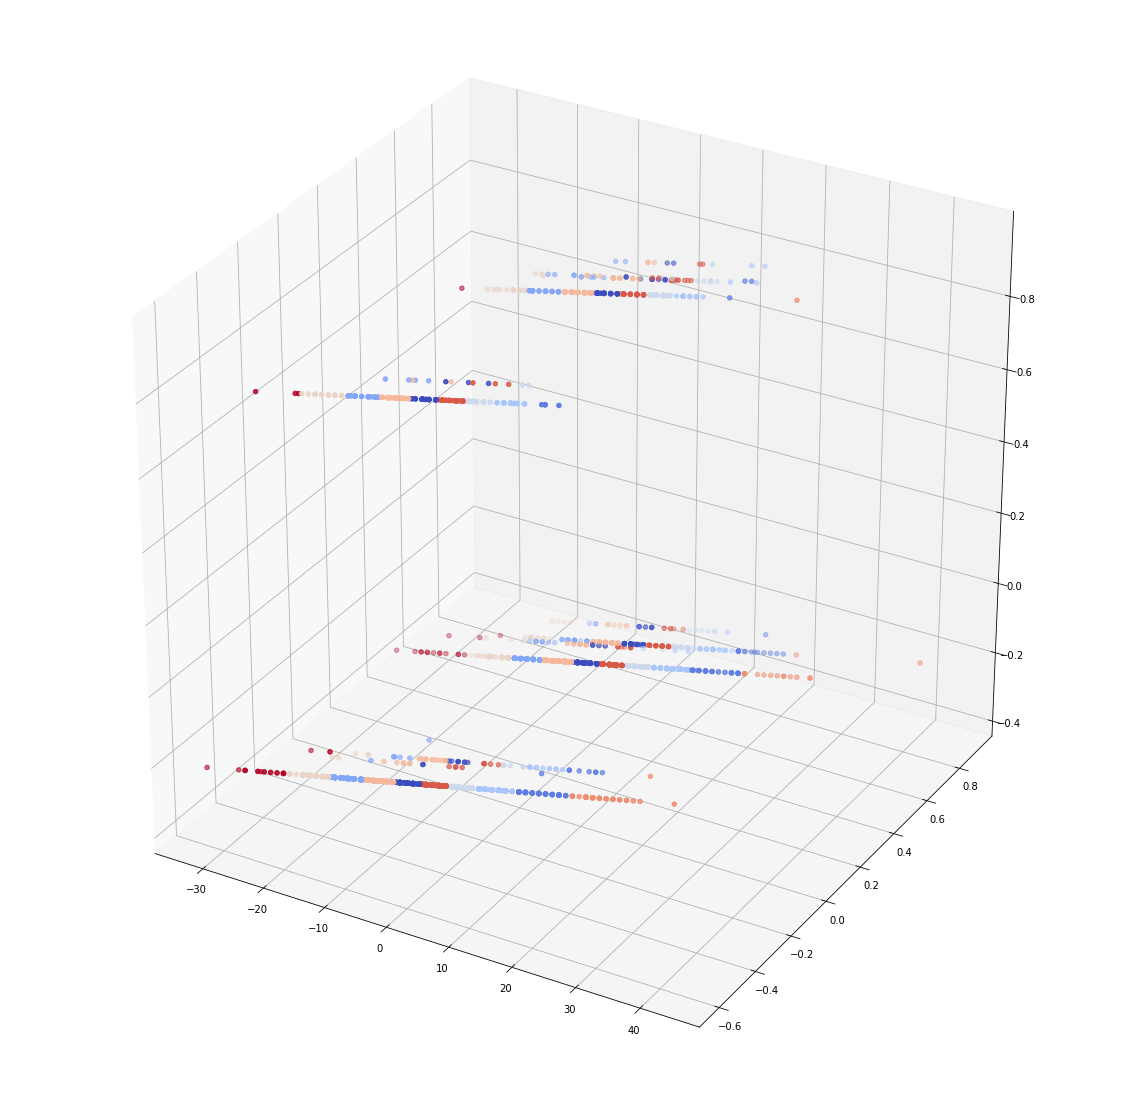

In [114]:
km = KMeans(n_clusters=10)
km.fit(x_pca_3)
pred = []

for i in range(len(x_pca_3)):
    predict_me = np.array(x_pca_3[i,:].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = km.predict(predict_me)
    pred.append(prediction[0])

fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_pca_3[:,0], x_pca_3[:,1], x_pca_3[:,2], c=pred, cmap='coolwarm')

In [53]:
#PCA - four components
pca_4 = PCA(n_components=4)
pca_4.fit(x)
x_pca_4 = pca_4.transform(x)
c_4 = pca_4.components_
v_4 = pca_4.explained_variance_
x_pca_4

array([[ 1.58020086e+00,  4.11290288e-01, -2.09041376e-01,
        -2.77884527e-01],
       [ 7.58147527e+00, -5.32147300e-01, -9.25850245e-02,
         3.65335277e-04],
       [-4.41975671e+00,  4.01410390e-01, -2.27902906e-01,
        -2.75395453e-01],
       ...,
       [-2.34196223e+01,  3.70124046e-01, -2.87631084e-01,
        -2.67513388e-01],
       [-4.41843987e+00, -5.51907096e-01, -1.30308085e-01,
         5.34348167e-03],
       [-8.41841158e+00, -5.58493695e-01, -1.42882438e-01,
         7.00286380e-03]])

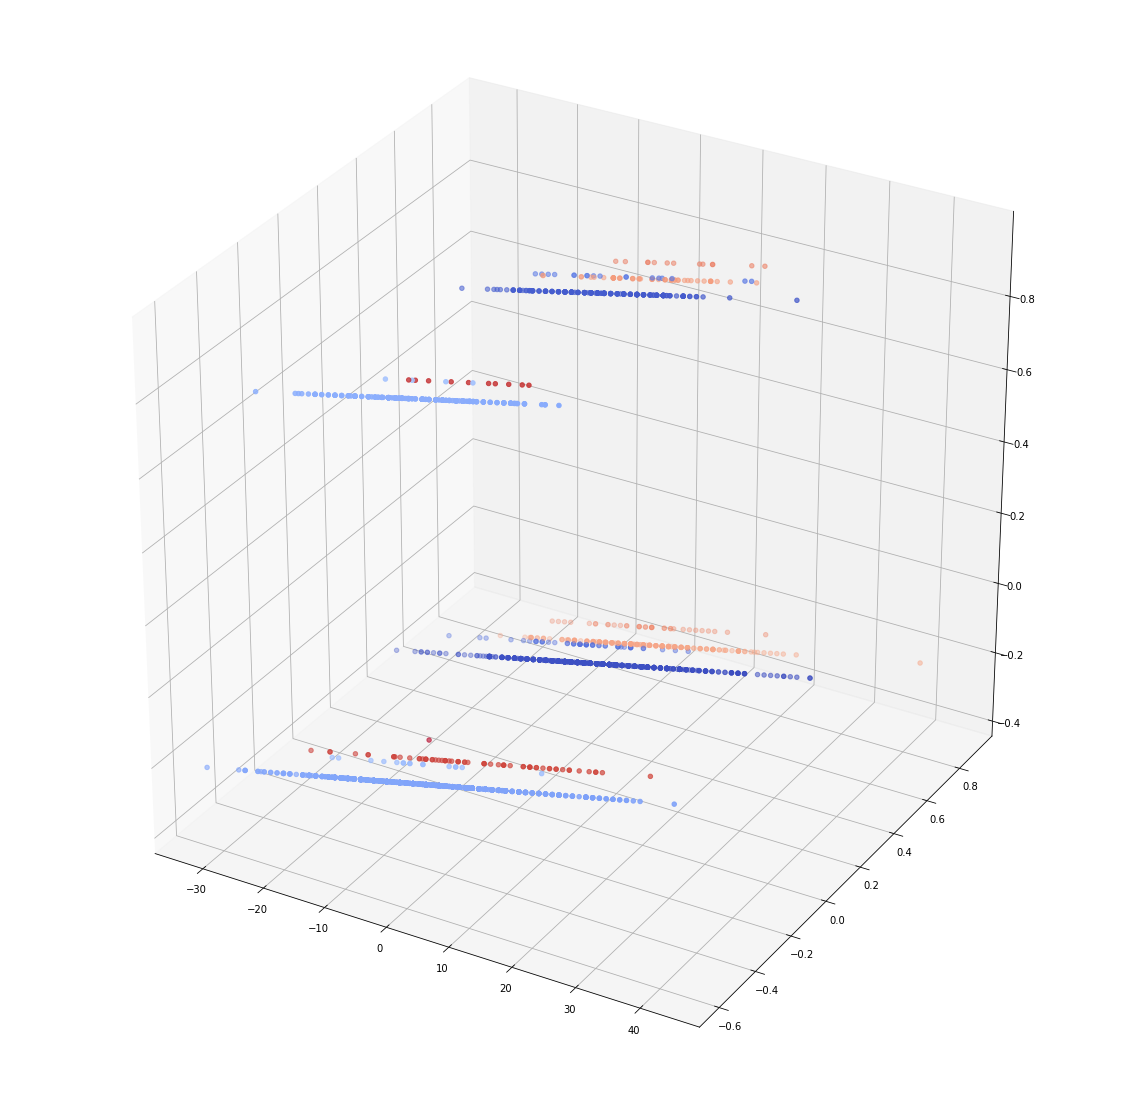

In [54]:
fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_pca_3[:,0], x_pca_3[:,1], x_pca_3[:,2], c=x_pca_4[:,3], cmap='coolwarm')

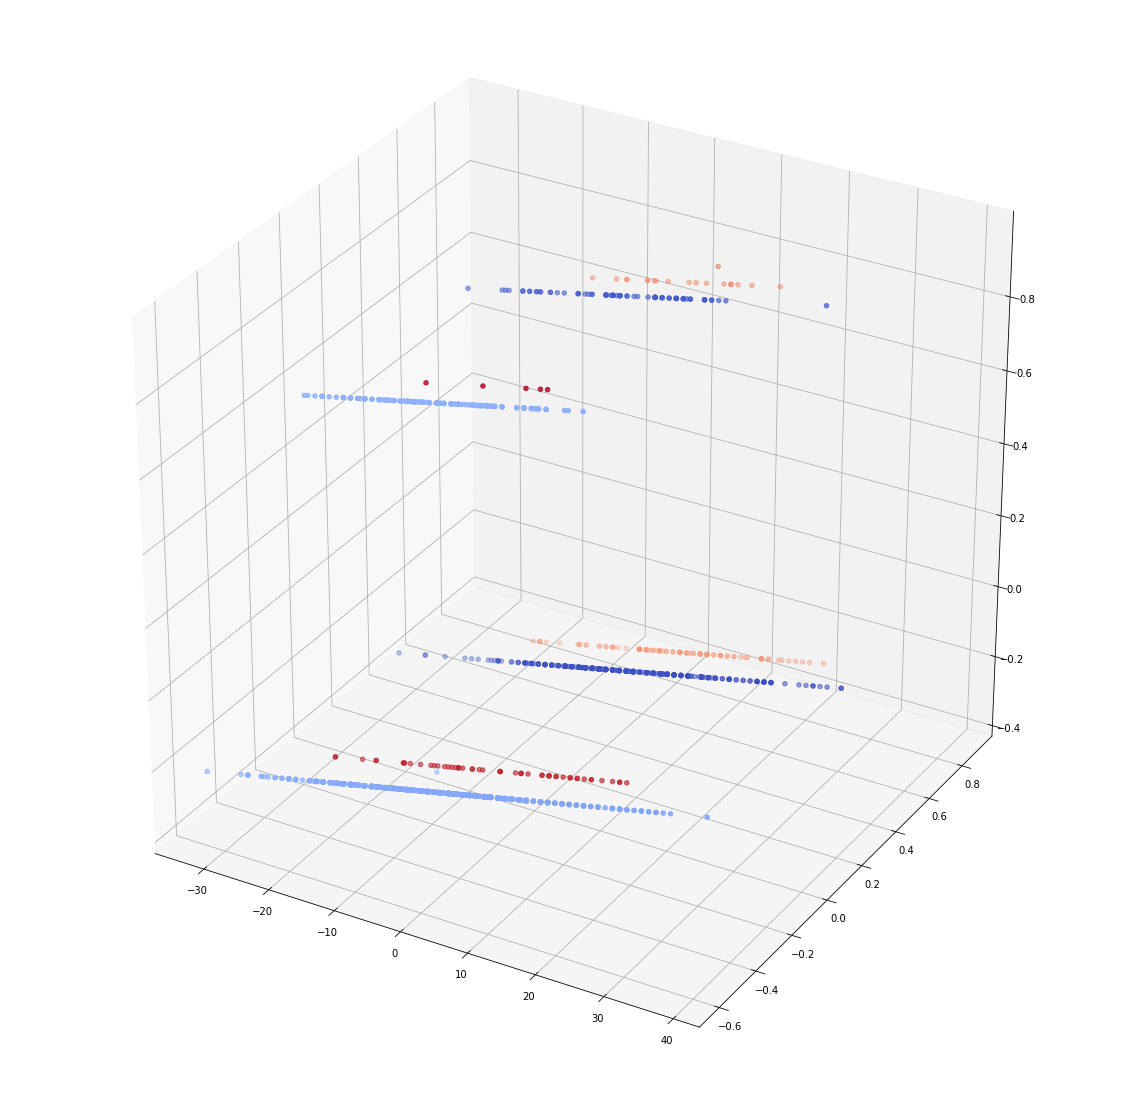

In [115]:
fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_pca_3[:1709,0], x_pca_3[:1709,1], x_pca_3[:1709,2], c=x_pca_4[:1709,3], cmap='coolwarm')

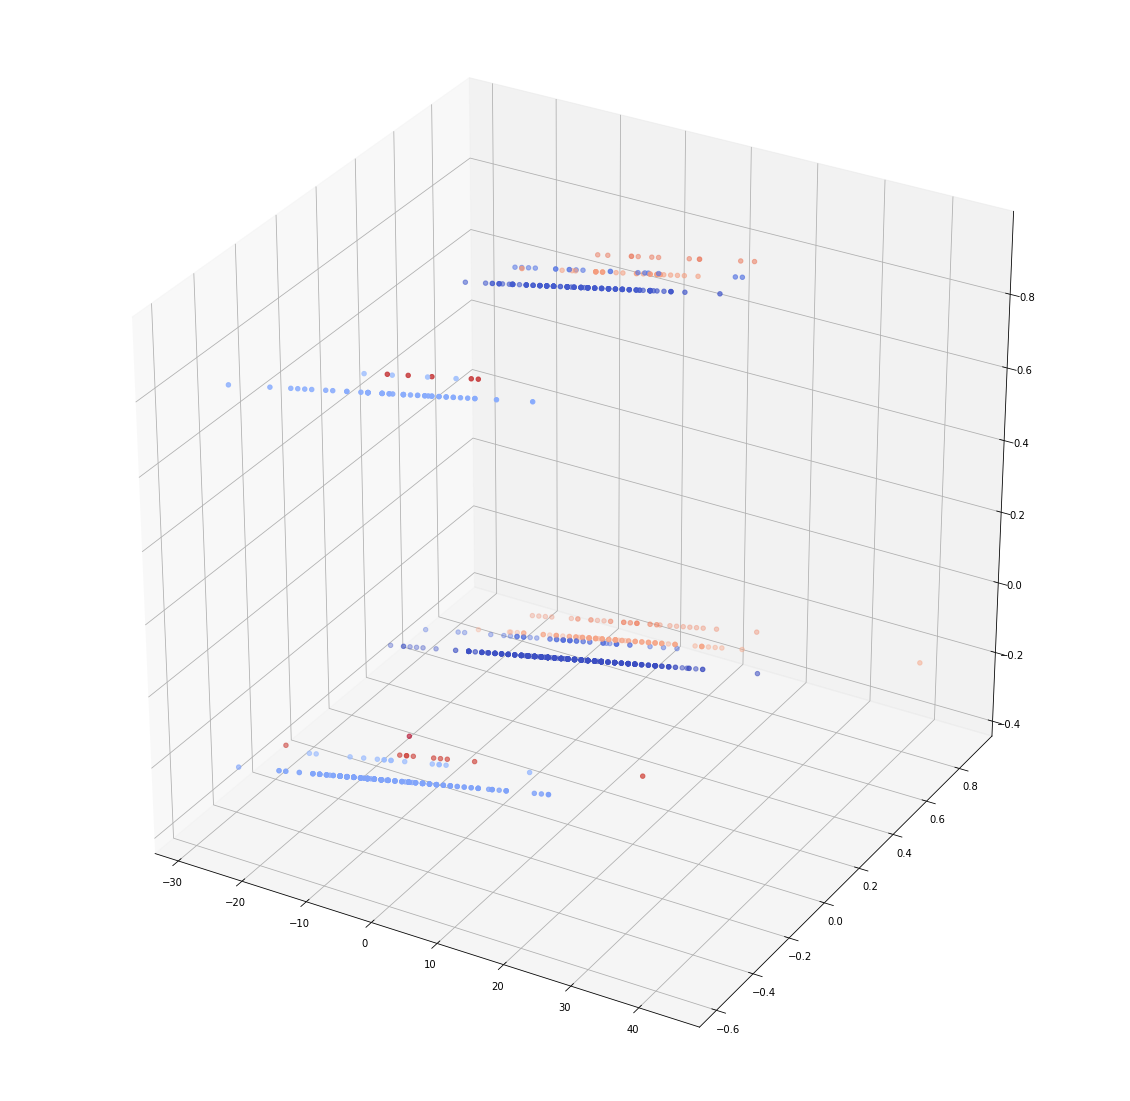

In [116]:
fig = plots.figure(figsize=(20, 20))
ax = plots.axes(projection='3d')
ax.scatter3D(x_pca_3[1709:,0], x_pca_3[1709:,1], x_pca_3[1709:,2], c=x_pca_4[1709:,3], cmap='coolwarm')

In [124]:
from sklearn import preprocessing

height_fl = x[["height"]].values.astype(float)
min_max_scaler = preprocessing.MinMaxScaler()
height_scaled = min_max_scaler.fit_transform(height_fl)
df_normalized = pd.DataFrame(height_scaled)
x_n = pd.concat([df_normalized, x[["htn", "dm", "stroke", "stress"]]], axis=1)
x_n


,0,htn,dm,stroke,stress
0,0.552632,1,0,0,0
1,0.473684,0,0,0,0
2,0.631579,1,0,0,0
3,0.414474,0,0,0,1
4,0.657895,0,0,0,0
...,...,...,...,...,...
2837,0.500000,1,0,0,0
2838,0.552632,1,0,0,0
2839,0.881579,1,0,0,0
2840,0.631579,0,0,0,0


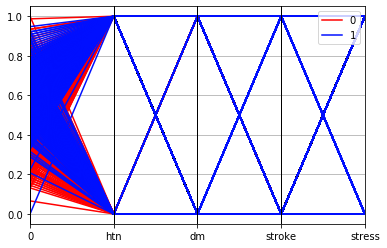

In [126]:
ss = preprocessing.StandardScaler()
scaled_df = ss.fit_transform(x_n)
scaled_df = pd.DataFrame(x_n, columns=["height","htn", "dm", "stroke", "stress"])
final_df = pd.concat([x_n, y], axis=1)
final_df.head()

from pandas.plotting import parallel_coordinates
pc = parallel_coordinates(final_df, 'case_control', color=('#FF0000', '#000FFF'))

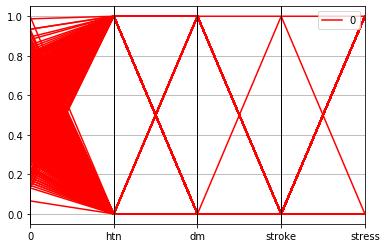

In [130]:
pc = parallel_coordinates(final_df.iloc[:1709,:], 'case_control', color='#FF0000')

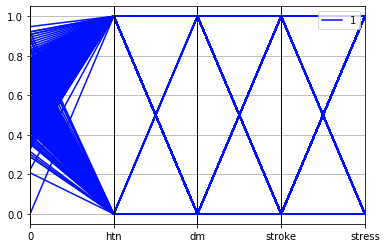

In [132]:
pc = parallel_coordinates(final_df.iloc[1709:,:], 'case_control', color='#000FFF')

In [136]:
fl_2 = x_pca.astype(float)
min_max_scaler_2 = preprocessing.MinMaxScaler()
scaled_2 = min_max_scaler.fit_transform(fl_2)
x_n_2 = pd.DataFrame(scaled_2)
x_n_2

,0,1
0,0.447357,0.676184
1,0.526323,0.044127
2,0.368409,0.669565
3,0.585491,0.123040
4,0.342110,0.028683
...,...,...
2837,0.499989,0.680597
2838,0.447357,0.676184
2839,0.118405,0.648605
2840,0.368426,0.030889


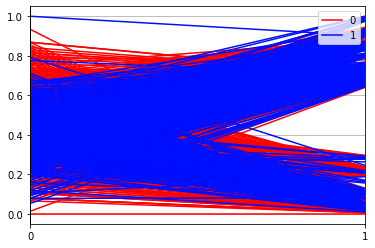

In [139]:
ss_2 = preprocessing.StandardScaler()
scaled_df_2 = ss_2.fit_transform(x_n_2)
scaled_df_2 = pd.DataFrame(x_n_2)
final_df_2 = pd.concat([x_n_2, y], axis=1)
final_df_2.head()
pc_2 = parallel_coordinates(final_df_2, 'case_control', color=('#FF0000', '#000FFF'))

In [140]:
fl_3 = x_pca_3.astype(float)
min_max_scaler_3 = preprocessing.MinMaxScaler()
scaled_3 = min_max_scaler.fit_transform(fl_3)
x_n_3 = pd.DataFrame(scaled_3)
x_n_3

,0,1,2
0,0.447357,0.676184,0.109826
1,0.526323,0.044127,0.200442
2,0.368409,0.669565,0.095150
3,0.585491,0.123040,0.984101
4,0.342110,0.028683,0.166197
...,...,...,...
2837,0.499989,0.680597,0.119610
2838,0.447357,0.676184,0.109826
2839,0.118405,0.648605,0.048674
2840,0.368426,0.030889,0.171090


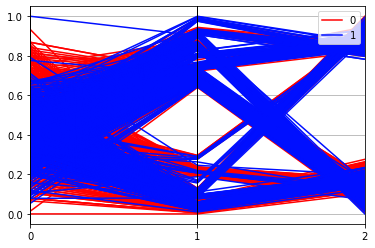

In [141]:
ss_3 = preprocessing.StandardScaler()
scaled_df_3 = ss_3.fit_transform(x_n_3)
scaled_df_3 = pd.DataFrame(x_n_3)
final_df_3 = pd.concat([x_n_3, y], axis=1)
final_df_3.head()
pc_3 = parallel_coordinates(final_df_3, 'case_control', color=('#FF0000', '#000FFF'))

In [142]:
fl_4 = x_pca_4.astype(float)
min_max_scaler_4 = preprocessing.MinMaxScaler()
scaled_4 = min_max_scaler.fit_transform(fl_4)
x_n_4 = pd.DataFrame(scaled_4)
x_n_4

,0,1,2,3
0,0.447357,0.676184,0.109826,0.009834
1,0.526323,0.044127,0.200442,0.215954
2,0.368409,0.669565,0.095150,0.011678
3,0.585491,0.123040,0.984101,0.240029
4,0.342110,0.028683,0.166197,0.220256
...,...,...,...,...
2837,0.499989,0.680597,0.119610,0.008605
2838,0.447357,0.676184,0.109826,0.009834
2839,0.118405,0.648605,0.048674,0.017516
2840,0.368426,0.030889,0.171090,0.219642


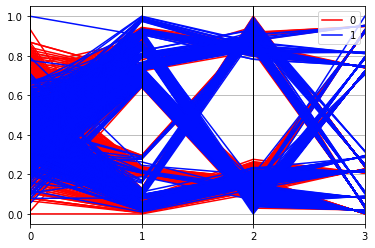

In [143]:
ss_4 = preprocessing.StandardScaler()
scaled_df_4 = ss_4.fit_transform(x_n_4)
scaled_df_4 = pd.DataFrame(x_n_4)
final_df_4 = pd.concat([x_n_4, y], axis=1)
final_df_4.head()
pc_4 = parallel_coordinates(final_df_4, 'case_control', color=('#FF0000', '#000FFF'))